# Task
Analyze the "dataset.csv" file to build a system that predicts mobile phone pricing (low/med/high/very high) based on the provided features. Explore the data, preprocess it, train a classification model, evaluate its performance, and use it to predict price ranges.

## Load the dataset

### Subtask:
Load the "dataset.csv" file into a pandas DataFrame.


**Reasoning**:
Import the pandas library and load the dataset.csv file into a pandas DataFrame.



In [ ]:
import pandas as pd

df = pd.read_csv('dataset.csv')
display(df.head())

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Explore the data

### Subtask:
Analyze the data to understand the features, their types, distributions, and relationships with the target variable.


**Reasoning**:
Display column names and data types, get descriptive statistics, and check for missing values to understand the data structure and identify potential issues.



In [ ]:
df.info()
display(df.describe())
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


**Reasoning**:
Examine the distribution of the target variable 'price_range' to understand the class balance.



In [ ]:
display(df['price_range'].value_counts())

,count
price_range,
1,500
2,500
3,500
0,500


**Reasoning**:
Visualize the distribution of the target variable 'price_range' to confirm the class balance visually and also visualize the distribution of 'ram' as it is expected to be a strong predictor of price range.



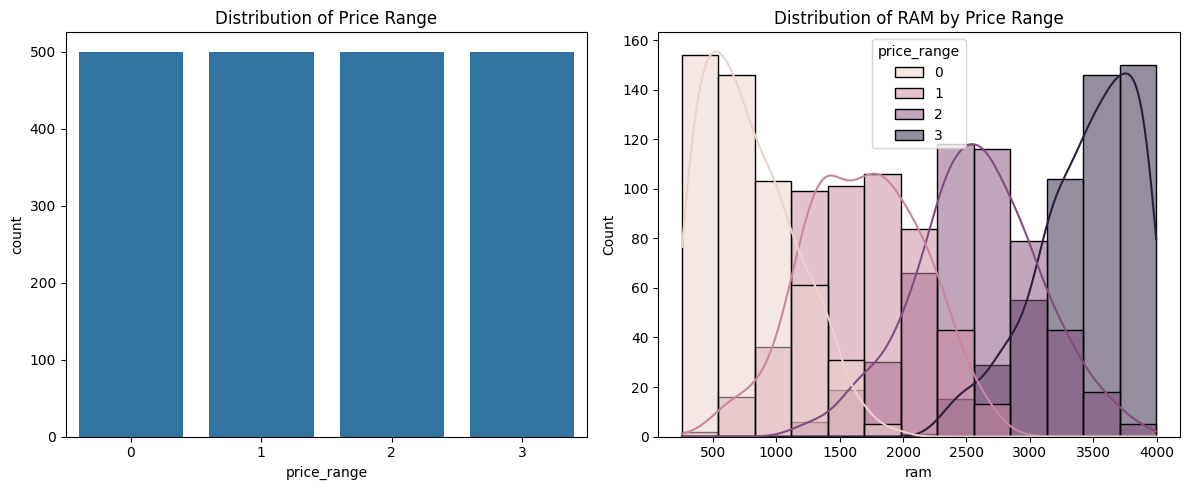

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x='price_range', data=df, ax=axes[0])
axes[0].set_title('Distribution of Price Range')

sns.histplot(data=df, x='ram', hue='price_range', kde=True, ax=axes[1])
axes[1].set_title('Distribution of RAM by Price Range')

plt.tight_layout()
plt.show()

## Preprocess the data

### Subtask:
Handle any missing values, outliers, or categorical features if necessary. Scale numerical features if required by the chosen model.


**Reasoning**:
Check for and handle missing values.



In [ ]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

# No missing values, so no handling is needed.

Missing values per column:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


**Reasoning**:
Identify numerical features and check for outliers using box plots.



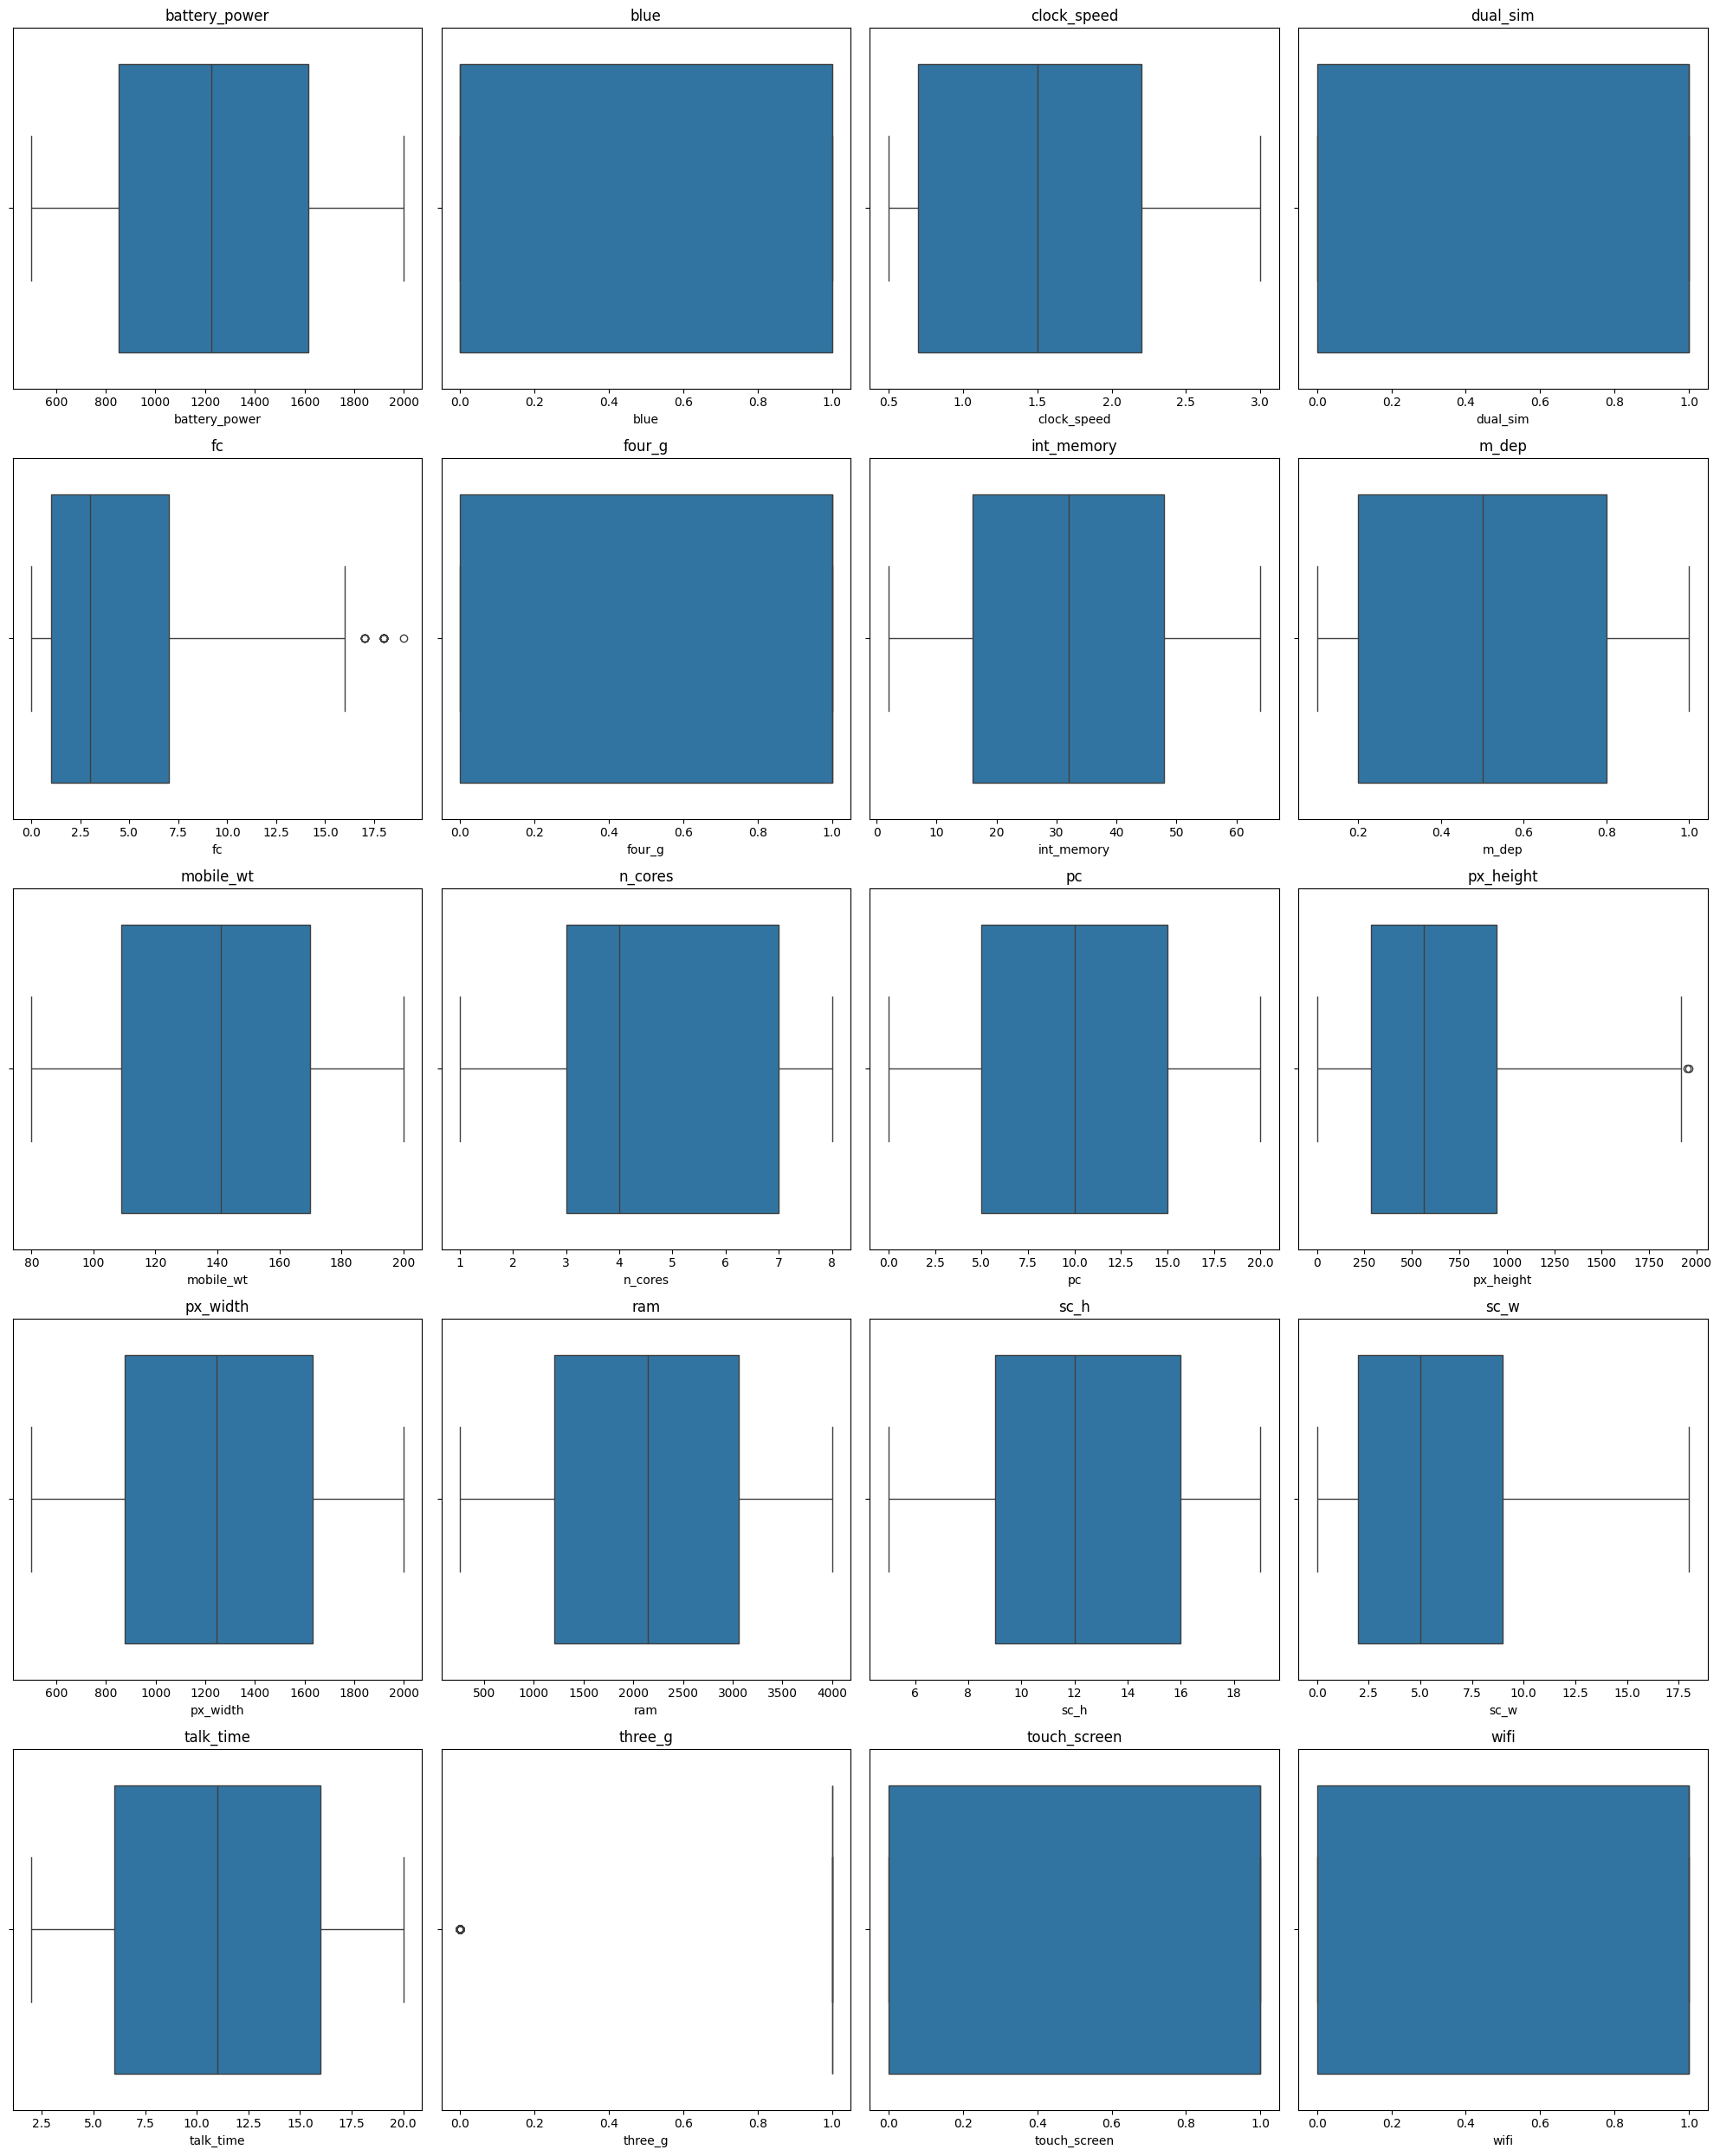

In [ ]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Exclude the target variable
numerical_features.remove('price_range')

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 25))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

**Reasoning**:
Handle outliers if necessary and check for categorical features. Based on the box plots, most features show some potential outliers, but they appear to be within a reasonable range for mobile phone specifications and might represent valid data points. Since there are no obvious data entry errors or extreme values that would skew the model significantly, and given the nature of this predictive task, we will proceed without removing or transforming these potential outliers. Also, based on `df.info()` and the column names, there are no apparent categorical features to encode.



In [ ]:
# No categorical features to encode based on df.info() and column names.
# No outliers will be explicitly handled at this stage, as the observed variations appear to be within realistic ranges for mobile phone specifications.

**Reasoning**:
Scale the numerical features in preparation for model training.



In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

display(df.head())

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,...,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097,1
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,...,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099,2
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,...,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099,2
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,...,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099,2
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,...,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099,1


## Split the data

### Subtask:
Split the dataset into training and testing sets.


**Reasoning**:
Import the train_test_split function, define features and target, and split the data into training and testing sets.



In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('price_range', axis=1)
y = df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1600, 20)
Shape of X_test: (400, 20)
Shape of y_train: (1600,)
Shape of y_test: (400,)


## Build and train a model

### Subtask:
Choose an appropriate classification model (e.g., Logistic Regression, Decision Tree, Random Forest, Support Vector Machine, or a neural network) and train it on the training data.


**Reasoning**:
Import the Random Forest Classifier model and train it on the training data.



In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluate the model

### Subtask:
Evaluate the trained model's performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).


**Reasoning**:
Calculate and print the evaluation metrics for the trained model on the test set.



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.8925
Precision: 0.8961
Recall: 0.8925
F1-score: 0.8933


## Predict on new data

### Subtask:
Use the trained model to predict the price range for new mobile phone data.


**Reasoning**:
Create a small DataFrame with new data points, ensure it has the same columns as the training data and is scaled, then use the trained model to predict their price ranges and print the predictions.



In [ ]:
import pandas as pd
import numpy as np

# Create new data points - ensure the order of columns matches X_train
new_data = pd.DataFrame({
    'battery_power': [0.5, -1.0, 1.5],
    'blue': [1.0, -1.0, 1.0],
    'clock_speed': [0.2, -0.5, 1.0],
    'dual_sim': [-1.0, 1.0, -1.0],
    'fc': [0.8, -0.9, 1.5],
    'four_g': [1.0, -1.0, 1.0],
    'int_memory': [1.2, -0.8, 0.5],
    'm_dep': [0.1, 0.5, -0.2],
    'mobile_wt': [0.3, -0.6, 1.1],
    'n_cores': [-0.5, 1.0, 0.2],
    'pc': [1.0, -0.7, 0.3],
    'px_height': [1.1, -0.5, 1.8],
    'px_width': [1.5, -0.8, 2.0],
    'ram': [1.8, -1.2, 0.9],
    'sc_h': [0.5, -0.3, 1.2],
    'sc_w': [0.8, -0.6, 1.0],
    'talk_time': [0.7, -1.1, 1.5],
    'three_g': [1.0, -1.0, 1.0],
    'touch_screen': [1.0, -1.0, 1.0],
    'wifi': [1.0, -1.0, 1.0]
})

# Ensure columns are in the same order as X_train
new_data = new_data[X_train.columns]

# Predict the price range
predicted_price_ranges = model.predict(new_data)

# Print the predicted price ranges
print("Predicted price ranges for new data:")
print(predicted_price_ranges)

Predicted price ranges for new data:
[3 0 3]


## Summary:

### Data Analysis Key Findings

*   The dataset contains 2000 entries and 21 columns, all of which are numerical.
*   There are no missing values in the dataset.
*   The target variable 'price\_range' is evenly distributed across its four categories (0, 1, 2, 3), with 500 entries in each category.
*   A positive relationship was observed between RAM and price\_range, suggesting phones with higher RAM tend to be in higher price ranges.
*   Numerical features were scaled using `StandardScaler`.
*   The dataset was split into training (80%) and testing (20%) sets.
*   A Random Forest Classifier model was trained on the training data.
*   The model achieved the following performance metrics on the test set: Accuracy: 0.8925, Precision: 0.8961, Recall: 0.8925, and F1-score: 0.8933.
*   The trained model successfully predicted price ranges for new, unseen data points.

### Insights or Next Steps

*   The Random Forest model demonstrated strong performance, indicating its suitability for this classification task.
*   Further analysis of feature importances from the Random Forest model could reveal which features are most influential in determining the price range.
